This is a supervised classification problem; the dependent variable is binary, 0 (for failure) and 1 (for success). As such, we will consider the following classification techniques:
* X Naive-Bays
* X logistic regression
* X KNN
* X SVM
* X kernel SVM
* X decision tree classification
* X random forest classification

Validation curves and learning curves will be considered when picking the best model for the project.

Optional:
* XGBoost
* Reduce variables (eg PCA, LDA)
* Optimize parameters (eg grid_search)
* Look into SGD Classifier

In [2]:
#-----------------------------------------
# USER INPUTS


In [2]:
#-----------------------------------------
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.options.display.max_columns = None # Shows all columns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [140]:
#-----------------------------------------
# DUMP/LOAD SESSION

import dill

# ---- DUMP ----
#dill.dump_session('./04 Working - Models.db')

# ---- LOAD ----
#dill.load_session('./04 Working - Models.db')

In [4]:
#-----------------------------------------
# IMPORT DATAFRAME

df = pd.read_csv('data/df02.csv', sep=',', na_filter=False, index_col=0, 
                 parse_dates=['launched_at'])

# Checks
if (df.isnull().sum().sum() != 0):
    print('*** WARNING: Null values introduced with read_csv ***')
if (df.isna().sum().sum() != 0):
    print('*** WARNING: NA values introduced with read_csv ***')
if (df=='').sum().sum() != 0:
    print('*** WARNING: Empty string (\'\') values introduced with read_csv ***')

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.isna().sum().sum()

0

In [7]:
(df == '').sum().sum()

0

In [8]:
df.columns

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'],
      dtype='object')

In [9]:
info_variables = ['id','launched_at','category','country', 'pledged_ratio', 'backers_count']

In [10]:
X = df.drop(columns=info_variables).drop(columns='launch_state')
y = df['launch_state']

In [11]:
#-----------------------------------------
# TRAIN/TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [12]:
#-----------------------------------------
# FEATURE SCALING

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
X_train.shape

(106085, 38)

In [14]:
y_train.shape

(106085,)

In [15]:
X_test.shape

(35362, 38)

In [16]:
y_test.shape

(35362,)

In [17]:
len(X_train) / (len(X_train) + len(X_test)) 

0.7499982325535359

In [ ]:
#==============================================================================
#
# NAIVE BAYES
#
#==============================================================================

In [18]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Naive-Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_nb = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_nb, 2), ' sec', sep='')

Runtime, fit: 0.1 sec


In [19]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_nb = classifier_nb.predict(X_test)

end_clock = time.clock()

clock_predict_nb = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_nb, 2), ' sec', sep='')

Runtime, predict: 0.04 sec


In [20]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Classification report
cr_nb = classification_report(y_test, y_pred_nb)

print(cm_nb)
print("\n")
print(cr_nb)

[[ 3429 11525]
 [ 1787 18621]]


             precision    recall  f1-score   support

          0       0.66      0.23      0.34     14954
          1       0.62      0.91      0.74     20408

avg / total       0.63      0.62      0.57     35362



In [21]:
acc_nb = cm_nb.diagonal().sum() / cm_nb.sum()
acc_nb

0.6235507041456931

In [22]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_nb = cross_val_score(
    estimator=classifier_nb, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_nb = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_nb, 2), ' sec', sep='')

Runtime, 10-fold CV: 1.54 sec


In [23]:
print("Accuracies:")
print(accuracies_nb)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_nb.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_nb.std(), 2)*100}%")

Accuracies:
[0.6269557  0.62130066 0.63163352 0.62188914 0.625      0.62886501
 0.62292609 0.61981523 0.62207768 0.6267911 ]


RESULTS:
  - Mean accuracy: 62.0%
  - Accuracy std dev: 0.0%


In [24]:
df_results_nb = pd.DataFrame([{
    'model':'Naive Bayes', 
    'time_fit':clock_fit_nb, 'time_predict':clock_predict_nb,
    'time_10_fold_CV':clock_10FCV_nb,
    'accuracy':acc_nb, 'acc_10_fold':accuracies_nb.mean()}])

In [25]:
df_results_nb = df_results_nb[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [26]:
df_results = df_results_nb

In [27]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.03627,1.535787,0.623551,0.624725


In [48]:
#==============================================================================
#
# LOGISTIC REGRESSION
#
#==============================================================================

In [28]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Logistic regression
classifier_LogReg = LogisticRegression(random_state=101)
classifier_LogReg.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_LogReg = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_LogReg, 2), ' sec', sep='')

Runtime, fit: 1.82 sec


In [29]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_LogReg = classifier_LogReg.predict(X_test)

end_clock = time.clock()

clock_predict_LogReg = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_LogReg, 2), ' sec', sep='')

Runtime, predict: 0.01 sec


In [30]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_LogReg = confusion_matrix(y_test, y_pred_LogReg)

# Classification report
cr_LogReg = classification_report(y_test, y_pred_LogReg)

print(cm_LogReg)
print("\n")
print(cr_LogReg)

[[ 7640  7314]
 [ 3495 16913]]


             precision    recall  f1-score   support

          0       0.69      0.51      0.59     14954
          1       0.70      0.83      0.76     20408

avg / total       0.69      0.69      0.69     35362



In [31]:
acc_LogReg = cm_LogReg.diagonal().sum() / cm_LogReg.sum()

In [32]:
acc_LogReg

0.6943328997228664

In [33]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_LogReg = cross_val_score(
    estimator=classifier_LogReg, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_LogReg = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_LogReg, 2), ' sec', sep='')

Runtime, 10-fold CV: 17.07 sec


In [34]:
print("Accuracies:")
print(accuracies_LogReg)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_LogReg.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_LogReg.std(), 2)*100}%")

Accuracies:
[0.68840716 0.69189444 0.69111132 0.68052413 0.69051659 0.69504148
 0.69334465 0.68344646 0.69692685 0.68863122]


RESULTS:
  - Mean accuracy: 69.0%
  - Accuracy std dev: 0.0%


In [35]:
df_results_LogReg = pd.DataFrame([{
    'model':'Logistic Regression', 
    'time_fit':clock_fit_LogReg, 'time_predict':clock_predict_LogReg,
    'time_10_fold_CV':clock_10FCV_LogReg,
    'accuracy':acc_LogReg, 'acc_10_fold':accuracies_LogReg.mean()}])
df_results_LogReg = df_results_LogReg[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [36]:
df_results = pd.DataFrame.append(df_results, df_results_LogReg).reset_index(drop=True)

In [37]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.535787,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.069607,0.694333,0.689984


In [ ]:
#==============================================================================
#
# K NEAREST NEIGHBORS
#
#==============================================================================

In [38]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# KNN
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_knn = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_knn, 2), ' sec', sep='')

Runtime, fit: 7.34 sec


In [39]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_knn = classifier_knn.predict(X_test)

end_clock = time.clock()

clock_predict_knn = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_knn, 2), ' sec', sep='')

Runtime, predict: 101.32 sec


In [40]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Classification report
cr_knn = classification_report(y_test, y_pred_knn)

print(cm_knn)
print("\n")
print(cr_knn)

[[ 8483  6471]
 [ 4748 15660]]


             precision    recall  f1-score   support

          0       0.64      0.57      0.60     14954
          1       0.71      0.77      0.74     20408

avg / total       0.68      0.68      0.68     35362



In [41]:
acc_knn = cm_knn.diagonal().sum() / cm_knn.sum()
acc_knn

0.6827385328884112

In [43]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_knn + clock_predict_knn)*10/60, 2), 
      ' min')

10-fold CV estimated time:  18.11  min


In [44]:
start_clock = time.clock()

accuracies_knn = cross_val_score(
    estimator=classifier_knn, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_knn = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_knn, 2), ' sec', sep='')

Runtime, 10-fold CV: 344.23 sec


In [45]:
print("Accuracies:")
print(accuracies_knn)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_knn.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_knn.std(), 2)*100}%")

Accuracies:
[0.6736098  0.66993402 0.6820624  0.66355581 0.68231523 0.68137255
 0.67458522 0.6770362  0.67449095 0.67911011]


RESULTS:
  - Mean accuracy: 68.0%
  - Accuracy std dev: 1.0%


In [46]:
df_results_knn = pd.DataFrame([{
    'model':'K Nearest Neighbors', 
    'time_fit':clock_fit_knn, 'time_predict':clock_predict_knn,
    'time_10_fold_CV':clock_10FCV_knn,
    'accuracy':acc_knn, 'acc_10_fold':accuracies_knn.mean()}])
df_results_knn = df_results_knn[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [47]:
df_results = pd.DataFrame.append(df_results, df_results_knn).reset_index(drop=True)

In [48]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.535787,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.069607,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234214,0.682739,0.675807


In [49]:
#==============================================================================
#
# SUPPORT VECTOR MACHINE
#
#==============================================================================

In [54]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# SVM
classifier_svm_linear = SVC(kernel="linear", random_state=101)
classifier_svm_linear.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_svm_linear = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_svm_linear, 2), ' sec', sep='')

Runtime, fit: 954.38 sec


In [55]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_svm_linear = classifier_svm_linear.predict(X_test)

end_clock = time.clock()

clock_predict_svm_linear = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_svm_linear, 2), ' sec', sep='')

Runtime, predict: 90.73 sec


In [56]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

# Classification report
cr_svm_linear = classification_report(y_test, y_pred_svm_linear)

print(cm_svm_linear)
print("\n")
print(cr_svm_linear)

[[ 6532  8422]
 [ 2994 17414]]


             precision    recall  f1-score   support

          0       0.69      0.44      0.53     14954
          1       0.67      0.85      0.75     20408

avg / total       0.68      0.68      0.66     35362



In [57]:
acc_svm_linear = cm_svm_linear.diagonal().sum() / cm_svm_linear.sum()
acc_svm_linear

0.6771675810191731

In [58]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_svm_linear + clock_predict_svm_linear)*10/60/60, 2), 
      ' hours')

10-fold CV estimated time:  2.9  hours


In [ ]:
# *** TIME-INTENSIVE ***
"""start_clock = time.clock()

accuracies_svm = cross_val_score(
    estimator=classifier_svm, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_svm = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_svm, 2), ' sec', sep='')"""

In [59]:
try:
    clock_10FCV_svm_linear
except:
    clock_10FCV_svm_linear = None
    print("No 10-fold CV time to report")

No 10-fold CV time to report


In [60]:
try:
    accuracies_svm_linear
except:
    accuracy_10FCV_mean_svm_linear = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_svm_linear = accuracies_svm_linear.mean()
    print("Accuracies:")
    print(accuracies_svm_linear)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_svm_linear.mean(),4)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_svm_linear.std(),4)*100}%")

No K-fold CV accuracies to report


In [61]:
df_results_svm_linear = pd.DataFrame([{
    'model':'SVM, Linear', 
    'time_fit':clock_fit_svm_linear, 'time_predict':clock_predict_svm_linear,
    'time_10_fold_CV':clock_10FCV_svm_linear,
    'accuracy':acc_svm_linear, 'acc_10_fold':accuracy_10FCV_mean_svm_linear}])
df_results_svm_linear = df_results_svm_linear[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [62]:
df_results = pd.DataFrame.append(df_results, df_results_svm_linear).reset_index(drop=True)

In [63]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None


In [ ]:
#==============================================================================
#
# SUPPORT VECTOR MACHINE, KERNEL RBF
#
#==============================================================================

In [64]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# SVM
classifier_svm_rbf = SVC(kernel="rbf", random_state=101)
classifier_svm_rbf.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_svm_rbf = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_svm_rbf, 2), ' sec', sep='')

Runtime, fit: 1091.78 sec


In [65]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

end_clock = time.clock()

clock_predict_svm_rbf = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_svm_rbf, 2), ' sec', sep='')

Runtime, predict: 120.43 sec


In [66]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Classification report
cr_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

print(cm_svm_rbf)
print("\n")
print(cr_svm_rbf)

[[ 7247  7707]
 [ 3506 16902]]


             precision    recall  f1-score   support

          0       0.67      0.48      0.56     14954
          1       0.69      0.83      0.75     20408

avg / total       0.68      0.68      0.67     35362



In [67]:
acc_svm_rbf = cm_svm_rbf.diagonal().sum() / cm_svm_rbf.sum()
acc_svm_rbf

0.6829082065494033

In [68]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_svm_rbf + clock_predict_svm_rbf)*10/60/60, 2), 
      ' hours')

10-fold CV estimated time:  3.37  hours


In [69]:
# *** TIME-INTENSIVE ***
"""start_clock = time.clock()

accuracies_svm_rbf = cross_val_score(
    estimator=classifier_svm_rbf, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_svm_rbf = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_svm_rbf, 2), ' sec', sep='')"""

"start_clock = time.clock()\n\naccuracies_svm_rbf = cross_val_score(\n    estimator=classifier_svm_rbf, X=X_train, y=y_train,\n    cv=10)\n\nend_clock = time.clock()\n\nclock_10FCV_svm_rbf = end_clock - start_clock\nprint('Runtime, 10-fold CV: ', round(clock_10FCV_svm_rbf, 2), ' sec', sep='')"

In [70]:
try:
    clock_10FCV_svm_rbf
except:
    clock_10FCV_svm_rbf = None
    print("No 10-fold CV time to report")

No 10-fold CV time to report


In [71]:
try:
    accuracies_svm_rbf
except:
    accuracy_10FCV_mean_svm_rbf = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_svm_rbf = accuracies_svm_rbf.mean()
    print("Accuracies:")
    print(accuracies_svm_rbf)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_svm_rbf.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_svm_rbf.std(), 2)*100}%")

No K-fold CV accuracies to report


In [72]:
df_results_svm_rbf = pd.DataFrame([{
    'model':'SVM, RBF', 
    'time_fit':clock_fit_svm_rbf, 'time_predict':clock_predict_svm_rbf,
    'time_10_fold_CV':clock_10FCV_svm_rbf,
    'accuracy':acc_svm_rbf, 'acc_10_fold':accuracy_10FCV_mean_svm_rbf}])
df_results_svm_rbf = df_results_svm_rbf[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [73]:
df_results = pd.DataFrame.append(df_results, df_results_svm_rbf).reset_index(drop=True)

In [74]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None
4,"SVM, RBF",1091.777649,120.427602,None,0.682908,None


In [ ]:
#==============================================================================
#
# DECISION TREE CLASSIFICATION
#
#==============================================================================

In [75]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Decision tree
classifier_dt = DecisionTreeClassifier(criterion="entropy", random_state=101)
classifier_dt.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_dt = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_dt, 2), ' sec', sep='')

Runtime, fit: 0.44 sec


In [76]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_dt = classifier_dt.predict(X_test)

end_clock = time.clock()

clock_predict_dt = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_dt, 2), ' sec', sep='')

Runtime, predict: 0.01 sec


In [77]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Classification report
cr_dt = classification_report(y_test, y_pred_dt)

print(cm_dt)
print("\n")
print(cr_dt)

[[ 8893  6061]
 [ 5808 14600]]


             precision    recall  f1-score   support

          0       0.60      0.59      0.60     14954
          1       0.71      0.72      0.71     20408

avg / total       0.66      0.66      0.66     35362



In [78]:
acc_dt = cm_dt.diagonal().sum() / cm_dt.sum()
acc_dt

0.6643572196142752

In [79]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_dt + clock_predict_dt)*10, 2), 
      ' sec')

10-fold CV estimated time:  4.52  sec


In [80]:
start_clock = time.clock()

accuracies_dt = cross_val_score(
    estimator=classifier_dt, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_dt = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_dt, 2), ' sec', sep='')

Runtime, 10-fold CV: 4.83 sec


In [81]:
try:
    clock_10FCV_dt
except:
    clock_10FCV_dt = None
    print("No 10-fold CV time to report")

In [82]:
try:
    accuracies_dt
except:
    accuracy_10FCV_mean_dt = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_dt = accuracies_dt.mean()
    print("Accuracies:")
    print(accuracies_dt)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_dt.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_dt.std(), 2)*100}%")

Accuracies:
[0.65230914 0.66399623 0.66556697 0.65177225 0.66855204 0.66826923
 0.6578997  0.66581825 0.6683635  0.66289593]


RESULTS:
  - Mean accuracy: 66.0%
  - Accuracy std dev: 1.0%


In [83]:
df_results_dt = pd.DataFrame([{
    'model':'Decision Tree', 
    'time_fit':clock_fit_dt, 'time_predict':clock_predict_dt,
    'time_10_fold_CV':clock_10FCV_dt,
    'accuracy':acc_dt, 'acc_10_fold':accuracy_10FCV_mean_dt}])
df_results_dt = df_results_dt[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [84]:
df_results = pd.DataFrame.append(df_results, df_results_dt).reset_index(drop=True)

In [85]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None
4,"SVM, RBF",1091.777649,120.427602,None,0.682908,None
5,Decision Tree,0.437127,0.014542,4.82765,0.664357,0.662544


In [ ]:
#==============================================================================
#
# RANDOM FOREST CLASSIFICATION (10 fold)
#
#==============================================================================

In [86]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Decision tree
classifier_rf10 = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=101)
classifier_rf10.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_rf10 = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_rf10, 2), ' sec', sep='')

Runtime, fit: 1.02 sec


In [87]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_rf10 = classifier_rf10.predict(X_test)

end_clock = time.clock()

clock_predict_rf10 = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_rf10, 2), ' sec', sep='')

Runtime, predict: 0.1 sec


In [88]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_rf10 = confusion_matrix(y_test, y_pred_rf10)

# Classification report
cr_rf10 = classification_report(y_test, y_pred_rf10)

print(cm_rf10)
print("\n")
print(cr_rf10)

[[ 8789  6165]
 [ 5036 15372]]


             precision    recall  f1-score   support

          0       0.64      0.59      0.61     14954
          1       0.71      0.75      0.73     20408

avg / total       0.68      0.68      0.68     35362



In [89]:
acc_rf10 = cm_rf10.diagonal().sum() / cm_rf10.sum()
acc_rf10

0.6832475538713874

In [90]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_rf10 + clock_predict_rf10)*10, 2), 
      ' sec')

10-fold CV estimated time:  11.21  sec


In [91]:
start_clock = time.clock()

accuracies_rf10 = cross_val_score(
    estimator=classifier_rf10, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_rf10 = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_rf10, 2), ' sec', sep='')

Runtime, 10-fold CV: 10.46 sec


In [92]:
try:
    clock_10FCV_rf10
except:
    clock_10FCV_rf10 = None
    print("No 10-fold CV time to report")

In [93]:
try:
    accuracies_rf10
except:
    accuracy_10FCV_mean_rf10 = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_rf10 = accuracies_rf10.mean()
    print("Accuracies:")
    print(accuracies_rf10)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_rf10.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_rf10.std(), 2)*100}%")

Accuracies:
[0.6797361  0.67917059 0.68620982 0.67062594 0.68514329 0.68712293
 0.67647059 0.68174962 0.68325792 0.67835596]


RESULTS:
  - Mean accuracy: 68.0%
  - Accuracy std dev: 0.0%


In [94]:
df_results_rf10 = pd.DataFrame([{
    'model':'Random Forest (10-fold)', 
    'time_fit':clock_fit_rf10, 'time_predict':clock_predict_rf10,
    'time_10_fold_CV':clock_10FCV_rf10,
    'accuracy':acc_rf10, 'acc_10_fold':accuracy_10FCV_mean_rf10}])
df_results_rf10 = df_results_rf10[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [95]:
df_results = pd.DataFrame.append(df_results, df_results_rf10).reset_index(drop=True)

In [96]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None
4,"SVM, RBF",1091.777649,120.427602,None,0.682908,None
5,Decision Tree,0.437127,0.014542,4.82765,0.664357,0.662544
6,Random Forest (10-fold),1.016743,0.104582,10.463,0.683248,0.680784


In [ ]:
#==============================================================================
#
# PRINCIPAL COMPONENT ANALYSIS
#
#==============================================================================

In [97]:
# Explore principal components
pca = PCA(n_components=None, random_state=101)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_pca = pca.explained_variance_ratio_

In [98]:
X_train_pca.shape

(106085, 38)

In [99]:
X_test_pca.shape

(35362, 38)

In [100]:
print(explained_variance_pca)

[0.04967563 0.0323651  0.03097407 0.03065522 0.02929117 0.02895901
 0.02881396 0.02861282 0.02827069 0.0281527  0.02760661 0.02750211
 0.02742789 0.02731728 0.02712207 0.02677776 0.02670148 0.02653106
 0.02647415 0.02646121 0.0264245  0.026394   0.02636637 0.02634576
 0.02632933 0.02631318 0.02630068 0.02625171 0.02622513 0.02604295
 0.02591925 0.02569279 0.02494222 0.02451341 0.02421073 0.02306018
 0.00287187 0.00010396]


Text(0,0.5,'Second Principal Component')

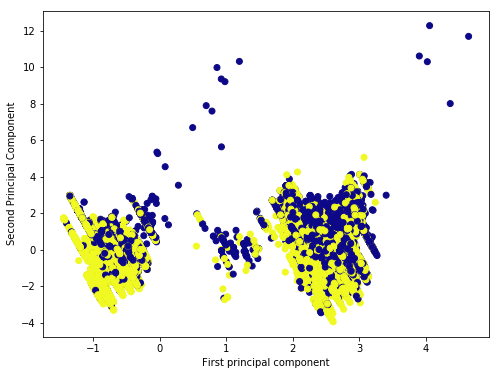

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [102]:
# Explore top two principal components
pca = PCA(n_components=2, random_state=101)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_pca = pca.explained_variance_ratio_

Text(0,0.5,'Second Principal Component')

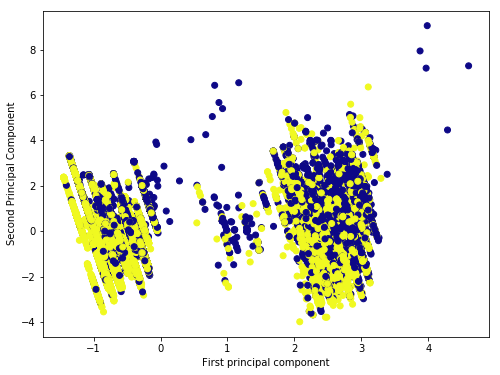

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [104]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None
4,"SVM, RBF",1091.777649,120.427602,None,0.682908,None
5,Decision Tree,0.437127,0.014542,4.82765,0.664357,0.662544
6,Random Forest (10-fold),1.016743,0.104582,10.463,0.683248,0.680784


In [105]:
#-----------------------------------------
# FIT MODEL (NAIVE BAYES)

start_clock = time.clock()

# Naive-Bayes
classifier_pca2_nb = GaussianNB()
classifier_pca2_nb.fit(X_train_pca, y_train)

end_clock = time.clock()

clock_fit_pca2_nb = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_pca2_nb, 2), ' sec', sep='')

end_clock = time.clock()

Runtime, fit: 0.02 sec


In [106]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_pca2_nb = classifier_pca2_nb.predict(X_test_pca)

end_clock = time.clock()

clock_predict_pca2_nb = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_pca2_nb, 2), ' sec', sep='')

Runtime, predict: 0.0 sec


In [107]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_pca2_nb = confusion_matrix(y_test, y_pred_pca2_nb)

# Classification report
cr_pca2_nb = classification_report(y_test, y_pred_pca2_nb)

print(cm_pca2_nb)
print("\n")
print(cr_pca2_nb)

[[ 4028 10926]
 [ 2888 17520]]


             precision    recall  f1-score   support

          0       0.58      0.27      0.37     14954
          1       0.62      0.86      0.72     20408

avg / total       0.60      0.61      0.57     35362



In [108]:
acc_pca2_nb = cm_pca2_nb.diagonal().sum() / cm_pca2_nb.sum()
acc_pca2_nb

0.6093546745093603

In [109]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_pca2_nb = cross_val_score(
    estimator=classifier_pca2_nb, X=X_train_pca, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_pca2_nb = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_pca2_nb, 2), ' sec', sep='')

Runtime, 10-fold CV: 0.28 sec


In [110]:
try:
    clock_10FCV_pca2_nb
except:
    clock_10FCV_pca2_nb = None
    print("No 10-fold CV time to report")

In [111]:
try:
    accuracies_pca2_nb
except:
    accuracy_10FCV_mean_pca2_nb = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_pca2_nb = accuracies_pca2_nb.mean()
    print("Accuracies:")
    print(accuracies_pca2_nb)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_pca2_nb.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_pca2_nb.std(), 2)*100}%")

Accuracies:
[0.61140434 0.60245052 0.61136771 0.60633484 0.60831448 0.61283937
 0.61189668 0.61076546 0.60690045 0.60699472]


RESULTS:
  - Mean accuracy: 61.0%
  - Accuracy std dev: 0.0%


In [112]:
df_results_pca2_nb = pd.DataFrame([{
    'model':'PCA (n=2), Naive Bayes', 
    'time_fit':clock_fit_pca2_nb, 'time_predict':clock_predict_pca2_nb,
    'time_10_fold_CV':clock_10FCV_pca2_nb,
    'accuracy':acc_pca2_nb, 'acc_10_fold':accuracy_10FCV_mean_pca2_nb}])
df_results_pca2_nb = df_results_pca2_nb[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [113]:
df_results = pd.DataFrame.append(df_results, df_results_pca2_nb).reset_index(drop=True)

In [114]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.101767,0.036270,1.53579,0.623551,0.624725
1,Logistic Regression,1.822522,0.009085,17.0696,0.694333,0.689984
2,K Nearest Neighbors,7.340739,101.319590,344.234,0.682739,0.675807
3,"SVM, Linear",954.375944,90.726687,None,0.677168,None
4,"SVM, RBF",1091.777649,120.427602,None,0.682908,None
5,Decision Tree,0.437127,0.014542,4.82765,0.664357,0.662544
6,Random Forest (10-fold),1.016743,0.104582,10.463,0.683248,0.680784
7,"PCA (n=2), Naive Bayes",0.024343,0.003595,0.284533,0.609355,0.608927


In [2]:
#==============================================================================
#
# GRID SEARCH
#
#==============================================================================

In [ ]:
# ---- RANDOM FOREST ----

In [115]:
# FIT MODEL

classifier_grid_rf = RandomForestClassifier(random_state=101)

\# ---- APPLY GRID SEARCH ----

Options include
* criterion
* n_estimators
* max_features
* max_depth
* min_samples_leaf
* min_samples_split

In [126]:
# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[1,10,100,1000],
    'max_features': [None, 'sqrt', 'log2']
}

In [127]:
# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

In [128]:
# Fit grid search object to training set

start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()

clock_grid_search_rf = end_clock - start_clock

print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:  1.1min remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


Runtime, grid search: 67.25 sec


In [129]:
# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Best accuracy: 71.0%


Best parameters: {'max_features': 'log2', 'min_samples_leaf': 10}


In [130]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[1,5,10,15,20,30,50,75],
    'max_features': [None, 'sqrt', 'log2']
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  2.2min
[Paralle

Runtime, grid search: 144.6 sec
Best accuracy: 71.0%


Best parameters: {'max_features': 'log2', 'min_samples_leaf': 20}


In [132]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[16,18,20,22,24,26,28],
    'max_features': [None, 'sqrt', 'log2']
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  2.2min finished

Runtime, grid search: 135.69 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 22}


In [133]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[21,22,23],
    'max_features': [None, 'sqrt', 'log2']
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   55.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   56.4s finished


Runtime, grid search: 57.41 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 22}


In [135]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [1,5,10,20,30,50,75,100]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.6min remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.9min finished


Runtime, grid search: 116.88 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 50}


In [136]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [35,40,45,50,55,60,65]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:  1.9min remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.1min finished


Runtime, grid search: 126.91 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 40}


In [137]:
# Search again

# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [36,37,38,39,40,41,42,43,44]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:  2.3min remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


Runtime, grid search: 145.42 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 40}


In [138]:
# Search again
RandomForestClassifier()
# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [40],
    'min_samples_leaf': [1,2,5,10,25,50,100]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:  1.9min remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.0min finished


Runtime, grid search: 125.18 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 25, 'n_estimators': 40}


In [139]:
# Search again
RandomForestClassifier()
# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [40],
    'min_samples_leaf': [15,20,25,30,35,40,45]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:  1.5min remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.6min finished


Runtime, grid search: 100.99 sec
Best accuracy: 72.0%


Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 30, 'n_estimators': 40}


In [ ]:
# Search again
RandomForestClassifier()
# Decide parameters to loop through
parameters_rf = {
    'min_samples_leaf':[22],
    'max_features': ['sqrt'],
    'n_estimators': [40],
    'min_samples_leaf': [36,37,38,39,40,41,42,43,44]
}

# Create grid search object
grid_search_rf = GridSearchCV(estimator=classifier_grid_rf,
    param_grid=parameters_rf, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

# Fit grid search object to training set
start_clock = time.clock()
grid_search_rf = grid_search_rf.fit(X_train, y_train)
end_clock = time.clock()
clock_grid_search_rf = end_clock - start_clock
print('Runtime, grid search: ', round(clock_grid_search_rf, 2), ' sec', sep='')

# Print results
best_accuracy_grid_search_rf = grid_search_rf.best_score_
best_parameters_grid_search_rf = grid_search_rf.best_params_
print(f"Best accuracy: {round(best_accuracy_grid_search_rf, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters_grid_search_rf}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [6]:
# ---- K NEAREST NEIGHBORS ----

In [11]:
classifier_knn_grid1 = KNeighborsClassifier()

In [12]:
# Decide parameters to loop through
parameters_knn1 = {
    'n_neighbors': [1,10,100]
#    'metric': ['minkowski'],
#    'p': [1, 2],
#    'weights': ['uniform', 'distance'],
#    'algorithm': ['ball_tree', 'kd_tree']
}

In [15]:
# Create grid search object
grid_search_knn1 = GridSearchCV(estimator=classifier_knn_grid1,
    param_grid=parameters_knn1, scoring="accuracy", cv=3,
    n_jobs=-1, verbose=10)

In [ ]:
# Fit grid search object to training set

start_clock = time.clock()
grid_search_knn1 = grid_search_knn1.fit(X_train, y_train)
end_clock = time.clock()

clock_grid_search_knn1 = end_clock - start_clock

print('Runtime, grid search: ', round(clock_grid_search_knn1, 2), ' sec', sep='')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [33]:
#==============================================================================
#
# VALIDATE
#
#==============================================================================

In [141]:
# ---- LOAD DATA ----
df_v = pd.read_csv('data/df_v.csv', sep=',', na_filter=False, index_col=0)

In [142]:
df_v.shape

(41140, 96)

In [143]:
df_v.head(2)

,state,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,pledged,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type,category_color,category_id,category_name,category_parent_id,category_position,category_slug,category_urls.web.discover,creator_avatar.medium,creator_avatar.small,creator_avatar.thumb,creator_chosen_currency,creator_id,creator_is_registered,creator_name,creator_slug,creator_urls.api.user,creator_urls.web.user,location_id,location_name,location_slug,location_short_name,location_displayable_name,location_localized_name,location_country,location_state,location_type,location_is_root,location_urls_web_discover,location_urls_web_location,location_urls_api_nearby_projects,photo_1024x576,photo_1536x864,photo_ed,photo_full,photo_key,photo_little,photo_med,photo_small,photo_thumb,profile_background_color,profile_background_image_attributes.id,profile_background_image_attributes.image_urls.baseball_card,profile_background_image_attributes.image_urls.default,profile_background_image_opacity,profile_blurb,profile_feature_image_attributes.id,profile_feature_image_attributes.image_urls.baseball_card,profile_feature_image_attributes.image_urls.default,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,urls_api.message_creator,urls_api.star,urls_web.message_creator,urls_web.project,urls_web.rewards
88147,canceled,14,An action/comedy film based in a world of unde...,657,US,1403916807,USD,$,True,USD,1407358364,False,,1.0,7500.0,950768404,,False,,1404766364,LARPE DIEM (Canceled),,657.0,larpe-diem,https://www.kickstarter.com/discover/categorie...,False,False,1406487223,1.0,657.0,international,16734574,292,Comedy,11.0,3,film & video/comedy,http://www.kickstarter.com/discover/categories...,https://ksr-ugc.imgix.net/assets/008/920/814/c...,https://ksr-ugc.imgix.net/assets/008/920/814/c...,https://ksr-ugc.imgix.net/assets/008/920/814/c...,,1141640382,True,Fat Kids On The Block Film Crew,,https://api.kickstarter.com/v1/users/114164038...,https://www.kickstarter.com/profile/1141640382,2424766.0,Houston,houston-tx,"Houston, TX","Houston, TX",Houston,US,TX,Town,False,https://www.kickstarter.com/discover/places/ho...,https://www.kickstarter.com/locations/houston-tx,https://api.kickstarter.com/v1/discover?signat...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,assets/011/734/576/357df2a68da6a9b411024dd13d6...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,,,,,0.8,,,https://ksr-ugc.imgix.net/assets/011/734/576/3...,https://ksr-ugc.imgix.net/assets/011/734/576/3...,1088243,,,,,,1088243,True,False,inactive,1425915860,,,,,https://www.kickstarter.com/projects/114164038...,https://www.kickstarter.com/projects/114164038...
171600,successful,198,Pindabear is our way of melding our love of ar...,5139,US,1500924807,USD,$,True,USD,1506282478,False,,1.0,2000.0,1651888765,,False,,1502063144,Pindabear Enamel Pins: Initial Launch,,5139.0,pindabear-enamel-pins-initial-launch,https://www.kickstarter.com/discover/categorie...,True,False,1506282478,1.0,5139.0,international,16760235,54,Mixed Media,1.0,6,art/mixed media,http://www.kickstarter.com/discover/categories...,https://ksr-ugc.imgix.net/assets/017/637/047/8...,https://ksr-ugc.imgix.net/assets/017/637/047/8...,https://ksr-ugc.imgix.net/assets/017/637/047/8...,,163403953

In [144]:
# ---- CLEAN DATA ----

#-----------------------------------------
# USER INPUTS


#-----------------------------------------
# IMPORT LIBRARIES

import pandas as pd
from datetime import datetime

#-----------------------------------------
# LOAD DATA

#df = pd.read_csv('data/df00.csv', sep=',', na_filter=False, index_col=0)

#-----------------------------------------
# CLEAN DATA

# ---- COLUMN CLEANUP ----
# Remove useless and nested dictionaries
drop_vars = ['photo_1024x576', 'photo_1536x864', 'photo_ed', 'photo_full', 
             'photo_key', 'photo_little', 'photo_med', 'photo_small', 
             'photo_thumb', 'slug', 'urls_api.message_creator', 'urls_api.star', 
             'urls_web.message_creator', 'urls_web.project', 'urls_web.rewards', 
             'source_url', 'creator_avatar.medium', 'creator_avatar.small', 
             'creator_avatar.thumb', 'creator_chosen_currency', 'creator_id', 
             'creator_name', 'creator_slug', 'creator_urls.api.user',
             'creator_urls.web.user', 'location_id', 'location_name', 
             'location_slug', 'location_short_name', 'location_displayable_name', 
             'location_localized_name', 'location_type', 'location_is_root', 
             'location_urls_web_discover', 'location_urls_web_location', 
             'location_urls_api_nearby_projects', 'category_color', 
             'category_id', 'category_urls.web.discover', 
             'profile_background_color', 
             'profile_background_image_attributes.id', 
             'profile_background_image_attributes.image_urls.baseball_card', 
             'profile_background_image_attributes.image_urls.default',
             'profile_background_image_opacity', 'profile_blurb', 
             'profile_feature_image_attributes.id', 
             'profile_feature_image_attributes.image_urls.baseball_card',
             'profile_feature_image_attributes.image_urls.default', 'profile_id',
             'profile_link_background_color', 'profile_link_text', 
             'profile_link_text_color', 'profile_link_url', 'profile_name', 
             'profile_project_id', 'profile_should_show_feature_image_section', 
             'profile_show_feature_image', 'profile_state', 
             'profile_state_changed_at', 'profile_text_color', 'currency_symbol',
             'static_usd_rate','converted_pledged_amount','fx_rate',
             'current_currency', 'usd_pledged', 'is_starrable', 'friends', 
             'is_backing', 'is_starred', 'permissions', 'name', 'blurb',
             'location_state', 'location_country', 'currency', 'currency_trailing_code', 
             'state_changed_at', 'category_parent_id', 'category_position', 
             'category_name', 'category_id', 'creator_is_registered', 
             'disable_communication', 'created_at', 'usd_type']

# =============================================================================
# Many of the variables removed were obviously not useful just by looking at them.
# Some, however, were not so obvious.
# * profile_state: probably active when live and inactive when finished
# * converted_pledged_amount: we just want the pledged amount (in USD)
# * fx_rate: appears to be exchange rate
# * usd_pledged: redundant with pledged
# * location_state: delete (too granular)
# * location_country: delete (not sure how it differs from country)
# * currency: delete (pledges is in usd)
# * currency_trailing_code - delete (what is it?)
# * state_changed_at: Seems to be when it changed launch state
# * creator_is_registered: all 'true'
# * disable_communication: all 'false'
# * created_at: we really care about 'launched_at' and 'deadline'
# =============================================================================

df_v.drop(columns=drop_vars, inplace=True)

# Rename columns
df_v.rename(columns={'category_slug':'category', 'state':'launch_state'}, inplace=True)

# Rearrange columns
df_v = df_v[['launch_state', 'id', 'category', 'goal', 'backers_count', 
         'pledged', 'country','deadline', 'launched_at', 
         'staff_pick', 'spotlight']]

# ---- EXTRACT CATEGORIES ----
# We extract the parent category strings
df_v['category'] = [i.split('/')[0] for i in df_v['category']]

# ---- REMOVE DUPLICATES ----
# Remove duplicate rows
df_v.drop_duplicates(inplace=True)
# For duplicate IDs leftover, removve the lesser pledged row
df_v = df_v.sort_values('pledged', ascending=False).drop_duplicates('id').sort_index()

# Check
if (len(df_v) - len(df_v["id"])) != 0:
    print('*** WARNING: There are ',
          len(df_v) - len(df_v["id"]), 
          ' duplicate IDs ***', sep='')

# Re-index
df_v.reset_index(drop=True, inplace=True)

# ---- CONVERT DATETIMES ----
# Convert date values to datetime 
# The default format of these values is in unix time format
df_v['deadline'] = df_v['deadline'].apply(datetime.utcfromtimestamp)
df_v['launched_at'] = df_v['launched_at'].apply(datetime.utcfromtimestamp)

# ---- NA IMPUTATION ----
# Checks
if df_v.isnull().sum().sum() != 0:
    print('*** WARNING: There are null values ***')
if df_v.isna().sum().sum() != 0:
    print('*** WARNING: There are NA values ***')
if (df_v=='').sum().sum() != 0:
    print('*** WARNING: There are empty string (\'\') values ***')

# ---- CLEAN UP 'launch_state' ----
df_v.query("launch_state == 'failed' | launch_state == 'successful'", inplace=True)
df_v.reset_index(drop=True, inplace=True)

# ---- CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES ----
category = pd.get_dummies(df_v['category'], drop_first=True)
country = pd.get_dummies(df_v['country'], drop_first=True)
d_launch_state = dict(zip(['failed','successful'], range(0,2)))
launch_state = df_v['launch_state'].map(d_launch_state)

# Check
if (df_v[df_v['launch_state'] == 'successful'].shape[0] - launch_state.sum() != 0):
    print('*** WARNING: Some launch_states did not map to 0/1 ***')

# Drop the categorical launch_state column 
# (keep 'category' and 'country' for  visualization)
df_v.drop(['launch_state'],axis=1,inplace=True)

# Add the new dummy variable launch_state column and move it to column index 0 
# and country to column index 3
df_v = pd.concat([launch_state, df_v], axis=1)
df_v = df_v[['launch_state', 'id', 'category', 'country', 'goal', 'backers_count', 
         'pledged','deadline', 'launched_at', 'staff_pick', 'spotlight']]

# Add the dummy variable country and category columns
df_v = pd.concat([df_v, category, country], axis=1)

# Checks
if (df_v.isnull().sum().sum() != 0):
    print('*** WARNING: Null values introduced with dummy variables ***')
if (df_v.isna().sum().sum() != 0):
    print('*** WARNING: NA values introduced with dummy variables ***')
if (df_v=='').sum().sum() != 0:
    print('*** WARNING: Empty string (\'\') values introduced with dummy variables ***')

# ---- CREATE 'PLEDGED_RATIO' ----
# pledged_ratio
pledged_ratio = df_v['pledged'] / df_v['goal']
df_v.insert(loc=df_v.columns.get_loc("pledged"), column='pledged_ratio', 
          value=pledged_ratio)
df_v.drop(columns='pledged', inplace=True)

# datetime columns
funding_days = (df_v['deadline'] - df_v['launched_at']).dt.days
df_v.insert(loc=df_v.columns.get_loc("deadline"), column='funding_days', 
          value=funding_days)
df_v.drop(columns='deadline', inplace=True)

# ---- MOVE 'LAUNCHED_AT' ----
launched_at = df_v['launched_at']
df_v.drop(columns='launched_at', inplace=True)
df_v.insert(loc=2, column='launched_at', value=launched_at)

# ---- CONVERT 'STAFF_PICK' AND 'SPOTLIGHT' TO DUMMIES ----
d_staff_pick = dict(zip([False,True], range(0,2)))
staff_pick = df_v['staff_pick'].map(d_staff_pick)

# Check
if (df_v[df_v['staff_pick'] == True].shape[0] - staff_pick.sum()) != 0:
    print('*** WARNING: \'staff_pick\' not mapped to 0/1 properly ***')

d_spotlight = dict(zip([False,True], range(0,2)))
spotlight = df_v['spotlight'].map(d_spotlight)

# Check
if (df_v[df_v['spotlight'] == True].shape[0] - spotlight.sum()) != 0:
    print('*** WARNING: \'spotlight\' not mapped to 0/1 properly ***')

df_v.drop(['staff_pick','spotlight'],axis=1,inplace=True)

df_v.insert(loc=df_v.columns.get_loc("comics"), column='staff_pick', value=staff_pick)
df_v.insert(loc=df_v.columns.get_loc("comics"), column='spotlight', value=spotlight)

# Checks
if (df_v.isnull().sum().sum() != 0):
    print('*** WARNING: Null values introduced with \'staff_pick\' and \'spotlight\' dummy variables ***')
if (df_v.isna().sum().sum() != 0):
    print('*** WARNING: NA values introduced with \'staff_pick\' and \'spotlight\' dummy variables ***')
if (df_v=='').sum().sum() != 0:
    print('*** WARNING: Empty string (\'\') values introduced with \'staff_pick\' and \'spotlight\' dummy variables ***')

#-----------------------------------------
# SAVE CSV

#df.to_csv('data/df01.csv', sep=",")


In [145]:
df.columns

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'],
      dtype='object')

In [146]:
df_v.columns

df_v.columns
Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'p

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE',
       'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO',
       'NZ', 'SE', 'SG', 'US'],
      dtype='object')

In [147]:
len([item for item in df.columns if item not in df_v.columns])

0

In [149]:
len([item for item in df_v.columns if item not in df.columns])

1

In [150]:
[item for item in df_v.columns if item not in df.columns]

['spotlight']

In [151]:
# ---- REDUCE VARIABLES ----
df_v.drop(columns='spotlight', inplace=True)

In [153]:
[item for item in df_v.columns if item not in df.columns]

[]

In [155]:
df_v.columns

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'],
      dtype='object')

In [157]:
info_variables

['id', 'launched_at', 'category', 'country', 'pledged_ratio', 'backers_count']

In [160]:
df_v.drop(columns=info_variables).drop(columns='launch_state').columns

Index(['goal', 'funding_days', 'staff_pick', 'comics', 'crafts', 'dance',
       'design', 'fashion', 'film & video', 'food', 'games', 'journalism',
       'music', 'photography', 'publishing', 'technology', 'theater', 'AU',
       'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP',
       'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
      dtype='object')

In [161]:
# ----X,y SPLIT ----
X_v = df_v.drop(columns=info_variables).drop(columns='launch_state')
y_v = df_v['launch_state']

In [162]:
sc_X

StandardScaler(copy=True, with_mean=True, with_std=True)

In [163]:
# ---- FEATURE SCALING ----
X_v = sc_X.transform(X_v)